This notebook describes why we need to do data visualization. The datasets from [Datasaurus Dozen]() have the same descritive statistics but different graphs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read data and view samples

In [2]:
datafile = 'DatasaurusDozen.tsv'
df = pd.read_table(datafile, sep='\t')
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
dataset,dino,dino,dino,dino,dino,dino,dino,dino,dino,dino
x,55.3846,51.5385,46.1538,42.8205,40.7692,38.7179,35.641,33.0769,28.9744,26.1538
y,97.1795,96.0256,94.4872,91.4103,88.3333,84.8718,79.8718,77.5641,74.4872,71.4103


In [3]:
pd.DataFrame(df.dataset.value_counts()).rename(columns={'dataset': 'count'}).transpose()

,dots,high_lines,star,dino,h_lines,bullseye,wide_lines,x_shape,slant_up,slant_down,away,circle,v_lines
count,142,142,142,142,142,142,142,142,142,142,142,142,142


## Descriptive analysis

In [4]:
# create descriptive analysis table for x and y
dsx, dsy = [], []
for dataset in df.dataset.unique():
    dfsx = df[df.dataset == dataset][['x']]
    dfsy = df[df.dataset == dataset][['y']]
    dsx.append(round(dfsx.describe(),2))
    dsy.append(round(dfsy.describe(),2))

dfx = pd.concat(dsx, axis=1, keys=df.dataset.unique())
dfy = pd.concat(dsy, axis=1, keys=df.dataset.unique())

In [5]:
dfx

,dino,away,h_lines,v_lines,x_shape,star,high_lines,dots,circle,bullseye,slant_up,slant_down,wide_lines
,x,x,x,x,x,x,x,x,x,x,x,x,x
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,54.26,54.27,54.26,54.27,54.26,54.27,54.27,54.26,54.27,54.27,54.27,54.27,54.27
std,16.77,16.77,16.77,16.77,16.77,16.77,16.77,16.77,16.76,16.77,16.77,16.77,16.77
min,22.31,15.56,22.00,30.45,31.11,27.02,17.89,25.44,21.86,19.29,20.21,18.11,27.44
25%,44.10,39.72,42.29,49.96,40.09,41.03,41.54,50.36,43.38,41.63,42.81,42.89,35.52
50%,53.33,53.34,53.07,50.36,47.14,56.53,54.17,50.98,54.02,53.84,54.26,53.14,64.55
75%,64.74,69.15,66.77,69.50,71.86,68.71,63.95,75.20,64.97,64.80,64.49,64.47,67.45
max,98.21,91.64,98.29,89.50,85.45,86.44,96.08,77.95,85.66,91.74,95.26,95.59,77.92


In [6]:
dfy

,dino,away,h_lines,v_lines,x_shape,star,high_lines,dots,circle,bullseye,slant_up,slant_down,wide_lines
,y,y,y,y,y,y,y,y,y,y,y,y,y
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,47.83,47.83,47.83,47.84,47.84,47.84,47.84,47.84,47.84,47.83,47.83,47.84,47.83
std,26.94,26.94,26.94,26.94,26.93,26.93,26.94,26.93,26.93,26.94,26.94,26.94,26.94
min,2.95,0.02,10.46,2.73,4.58,14.37,14.91,15.77,16.33,9.69,5.65,0.30,0.22
25%,25.29,24.63,30.48,22.75,23.47,20.37,22.92,17.11,18.35,26.24,24.76,27.84,24.35
50%,46.03,47.54,50.47,47.11,39.88,50.11,32.50,51.30,51.03,47.38,45.29,46.40,46.28
75%,68.53,71.80,70.35,65.85,73.61,63.55,75.94,82.88,77.78,72.53,70.86,68.44,67.57
max,99.49,97.48,90.46,99.69,97.84,92.21,87.15,94.25,85.58,85.88,99.58,99.64,99.28


As we can see, in each sub-dataset with 142 datapoints, $x$ has the mean $= 54.26$, std $= 16.77$, $y$ has mean $= 47.83$, std $= 26.94$

## Correlation matrices

In [7]:
corrs = []
for subset in df.dataset.unique():
    dfa = df[df.dataset == subset]
    corrs.append(dfa.corr())
pd.concat(corrs, axis=0, keys=df.dataset.unique())

x         y
dino       x  1.000000 -0.064472
           y -0.064472  1.000000
away       x  1.000000 -0.064128
           y -0.064128  1.000000
h_lines    x  1.000000 -0.061715
           y -0.061715  1.000000
v_lines    x  1.000000 -0.069446
           y -0.069446  1.000000
x_shape    x  1.000000 -0.065583
           y -0.065583  1.000000
star       x  1.000000 -0.062961
           y -0.062961  1.000000
high_lines x  1.000000 -0.068504
           y -0.068504  1.000000
dots       x  1.000000 -0.060341
           y -0.060341  1.000000
circle     x  1.000000 -0.068343
           y -0.068343  1.000000
bullseye   x  1.000000 -0.068586
           y -0.068586  1.000000
slant_up   x  1.000000 -0.068609
           y -0.068609  1.000000
slant_down x  1.000000 -0.068980
           y -0.068980  1.000000
wide_lines x  1.000000 -0.066575
           y -0.066575  1.000000

In the next step we will plot x and y to see what is insight each sub-dataset
## Scatter plot and linear regression model

In [8]:
from sklearn.linear_model import LinearRegression as LR
lr = LR() # initialise regression model

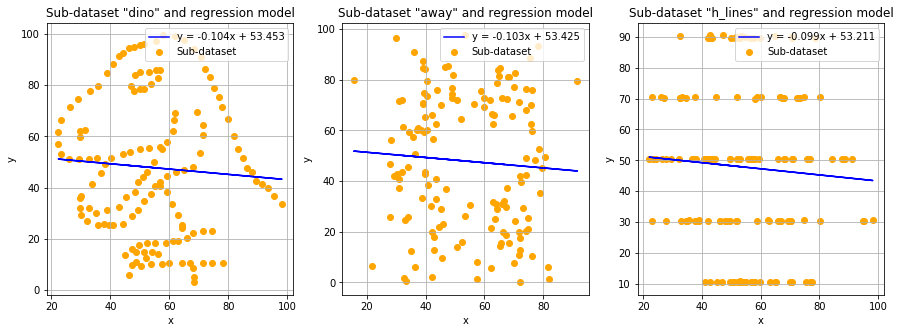

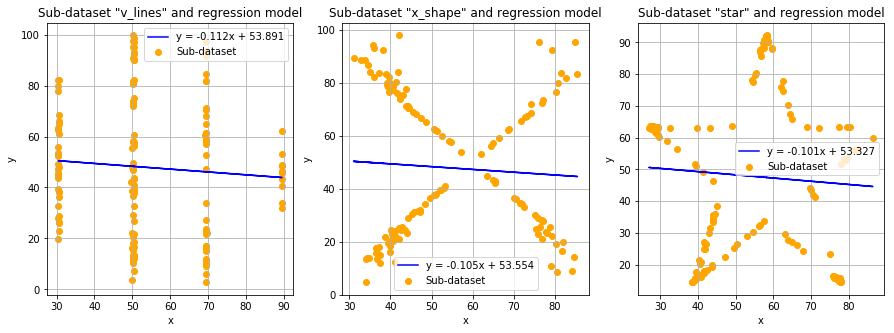

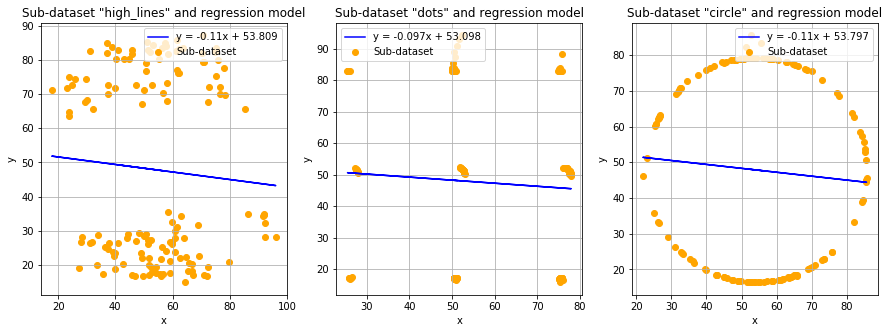

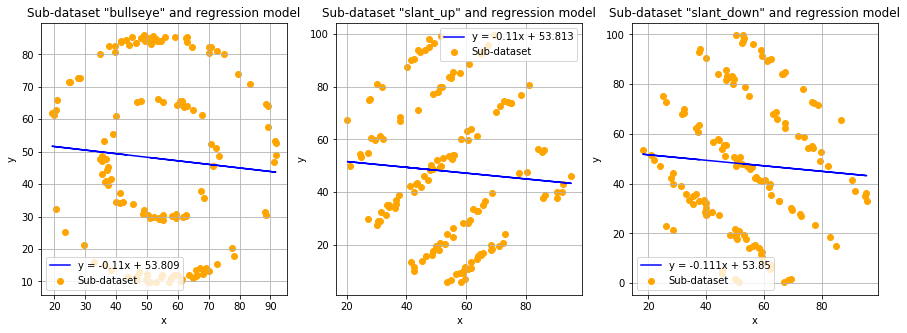

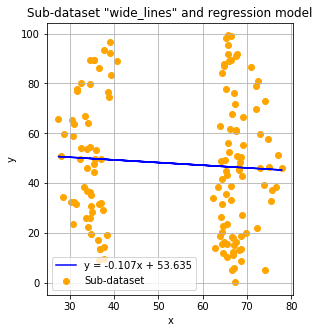

In [9]:
i = 0
for subset in df.dataset.unique():
    dfa = df[df.dataset == subset]
    # train model
    lr.fit(dfa[['x']], dfa[['y']])
    # get prediction and add to sub-dataset
    dfaa = pd.DataFrame(lr.predict(dfa[['x']]), index=dfa.index, columns=['p'])
    dfa = pd.concat([dfa, dfaa], axis=1)
    # get coefficients of the model
    coef = round(lr.coef_[0][0], 3)
    bias = round(lr.intercept_[0], 3)
    # plotting
    if i % 3 == 0:
        plt.figure(figsize=(15,5))
        
    plt.subplot(1, 3, i%3+1)
    plt.scatter(dfa.x, dfa.y, label='Sub-dataset', c='orange', marker="o")
    plt.plot(dfa.x, dfa.p, label='y = {}x + {}'.format(coef, bias), c='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sub-dataset \"{}\" and regression model'.format(subset))
    plt.grid(True)
    plt.legend()
    i+=1
plt.show()

## Conclusion:

As we can see from the figures, sub-datasets have similar linear regression models and correlation matricies, but their distribution is very diffenrent. These figures have shown the importance of data visualization.